Title: Train a Linear Regression Model

Task 1: Predicting House Prices<br>
Dataset: Use a dataset that contains various features of houses such as square footage, number of bedrooms, and age of the house.

📊 Coefficients:
SquareFootage: 107.06
Bedrooms: 11049.90
HouseAge: -836.59

Mean Squared Error: 418737991.05
R² Score: 0.766


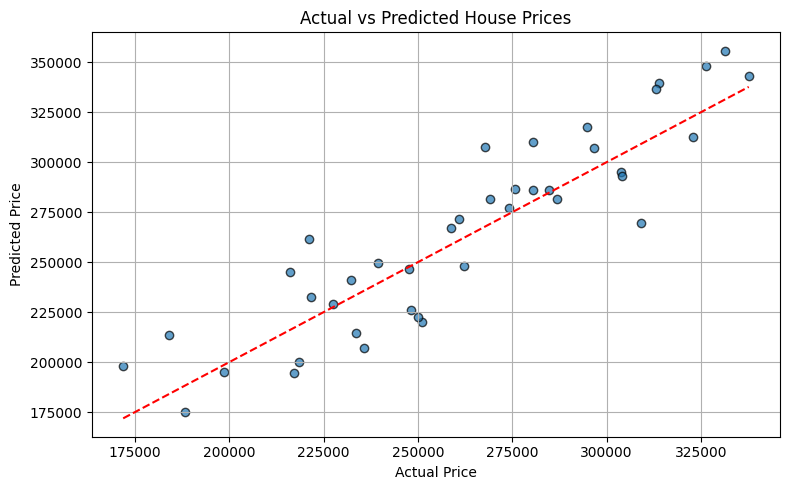

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset
np.random.seed(42)
n_samples = 200
square_footage = np.random.normal(2000, 500, n_samples)         # in sq ft
bedrooms = np.random.randint(2, 6, n_samples)                   # 2 to 5 bedrooms
house_age = np.random.randint(1, 50, n_samples)                 # age in years

# Create prices using a linear equation + noise
price = 50000 + 100 * square_footage + 10000 * bedrooms - 800 * house_age + np.random.normal(0, 20000, n_samples)

# Create DataFrame
df = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'HouseAge': house_age,
    'Price': price
})

# Step 2: Split into features and target
X = df[['SquareFootage', 'Bedrooms', 'HouseAge']]
y = df['Price']

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 6: Output results
print("📊 Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.2f}")
    
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# Optional: Plot predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors="k")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.tight_layout()
plt.show()


Task 2: Predicting Car Mileage (MPG)<br>
Dataset: Use a dataset where features include horsepower, weight, and model year of cars.

/tmp/ipykernel_5193/2681965968.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


 Loaded shape: (392, 9)
   horsepower  weight  model_year   mpg
0       130.0  3504.0          70  18.0
1       165.0  3693.0          70  15.0
2       150.0  3436.0          70  18.0
3       150.0  3433.0          70  16.0
4       140.0  3449.0          70  17.0

 Coefficients:
horsepower: -0.009
weight: -0.006
model_year: 0.759

 Mean Squared Error: 10.60
 R² Score: 0.792


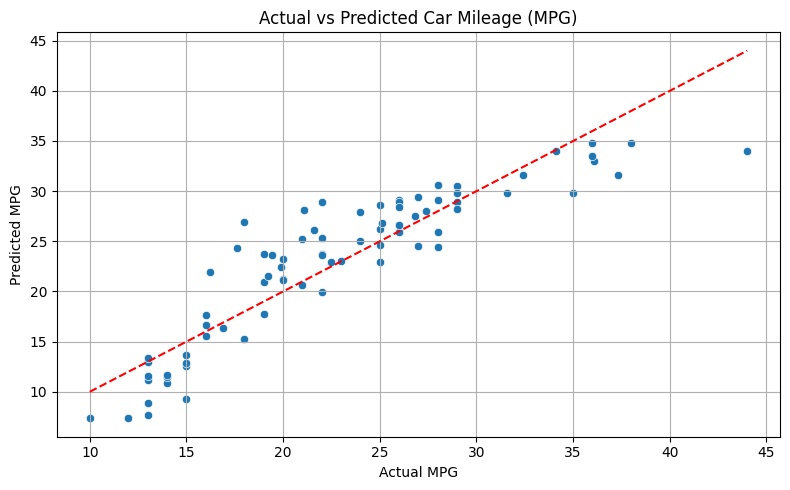

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Auto MPG dataset with correct settings
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration','model_year','origin','car_name']

# Use delim_whitespace instead of sep=' '
df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
df.dropna(inplace=True)

# Confirm data loaded
print(" Loaded shape:", df.shape)
print(df[['horsepower', 'weight', 'model_year', 'mpg']].head())

# Feature selection
features = ['horsepower', 'weight', 'model_year']
X = df[features]
y = df['mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("\n Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"{name}: {coef:.3f}")

print(f"\n Mean Squared Error: {mse:.2f}")
print(f" R² Score: {r2:.3f}")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted Car Mileage (MPG)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


Task 3: Predicting Student's Scores'
Dataset: Use a dataset that contains study hours and corresponding student test scores.

 Mean Squared Error: 1.71
 R² Score: 0.998
 Regression Coefficient: 9.24
 Intercept: 1.67


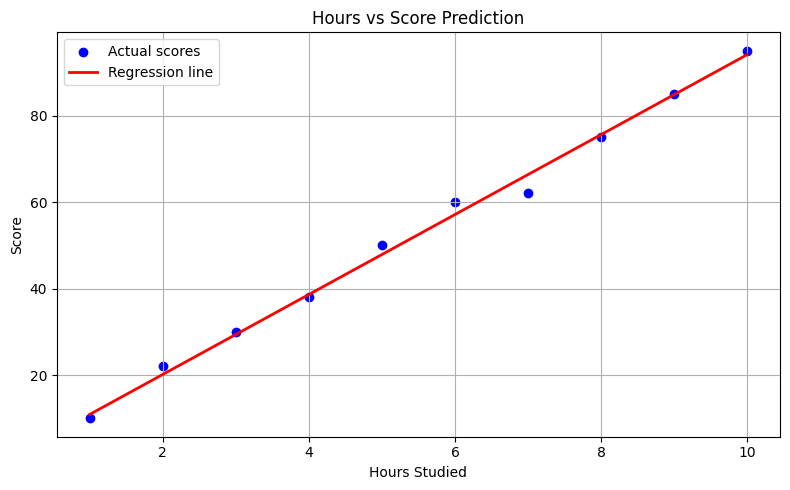

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create the dataset (or load it from a file)
# Sample dataset
data = {
    "Hours": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    "Scores": [10, 22, 30, 38, 50, 60, 62, 75, 85, 95]
}
df = pd.DataFrame(data)

# Step 2: Define features and target
X = df[['Hours']]  # input must be 2D
y = df['Scores']

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error: {mse:.2f}")
print(f" R² Score: {r2:.3f}")
print(f" Regression Coefficient: {model.coef_[0]:.2f}")
print(f" Intercept: {model.intercept_:.2f}")

# Step 7: Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual scores')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Hours vs Score Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
